# Caso de aplicación Agrupamiento aerolinea (mercadeo)

Una aerolínea tiene la necesidad de identificar la estrategia de atención de sus clientes, identificando la posibilidad de generar esquemas diferenciados de acción dependiendo de las
determinaciones y capacidades de los clientes. Es por esto que el equipo de mercadeo decidió realizar una encuesta tratando de levantar de manera demográfica el comportamiento de los
clientes.

## Metodologia ASUM - DM

### 1. Entendimiento del negocio:
Es una aerolinea que busca entender a sus clientes en particular. El objetivo de negocio es entender las diferencias o particularidades entre clientes para ofrecer modelos diferenciados de actuación.

### 2. Enfoque analitico:
Diseñoar un experimento que permita agrupar en una cantidad especifica de grupos a los clientes de la aerolinea para definir la cantidad de acciones diferenciadas posibles.

### 3. Requerimiento de datos:
Se requieren datos demograficos, datos del servicio prestado al usuario, datos propios del negocio

### 4. Recolección de datos:
![Información sobre la recolección de datos](info_datos.png)

### 5. Entendimiento de los datos:
- Identificar la existencia de datos nulos
- Exploracion univariada de los datos
- Exploracion multivariadad de los datos
- Identificación de correlacion y multicolinealidad

## Modelo agrupamiento

### Importaciones

In [2]:
# Manipulacion de datos
import pandas as pd
import numpy as np

# Graficos
import matplotlib.pyplot as plt
import seaborn as sb

# Transformaciones de variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

### Data

In [3]:
data = pd.read_csv('./airline_loyalty.csv')
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

#### Datos nulos

**¿Que hacer?**
1. **Eliminar:**

    1.1. *Registros:* Cuando la proporcion de eliminacion total no supera el 10% de los registros.

    1.2. *Variables:* Cuando la proporcion de nulos en una variable supera el 40%

2. **Imputar:**

    2.1. *Simple:*

      - Constante: Se define un valor para completar.
      - Medidas de tendencia central: Para numericas, media o mediana. Para otros con moda.

    2.2. *Modelo:* Construye un modelo de ML de regresión para completas los datos nulos. **Mejor opción, la más compleja**

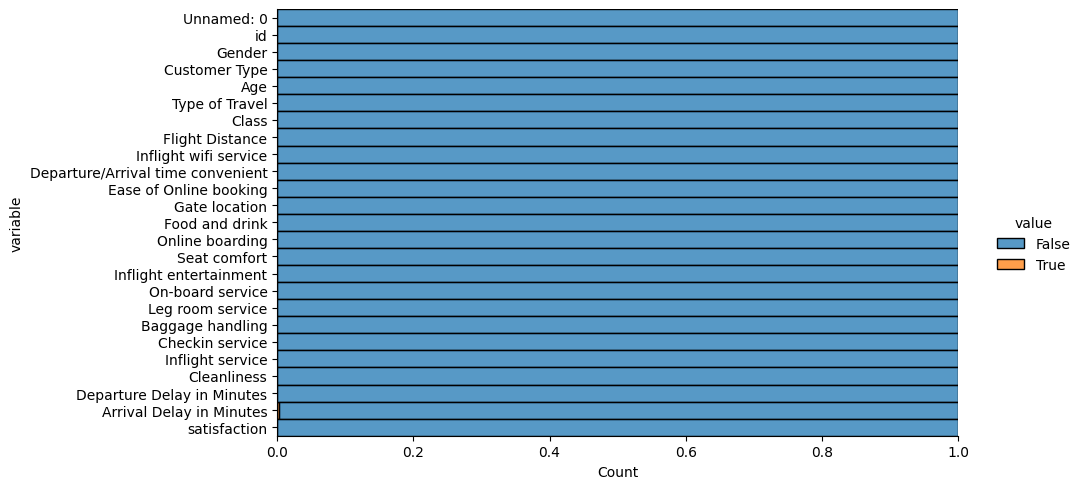

In [5]:
data.isnull().melt().pipe(lambda df: sb.displot(data = df, y = 'variable', hue = 'value', multiple = 'fill', aspect = 2))

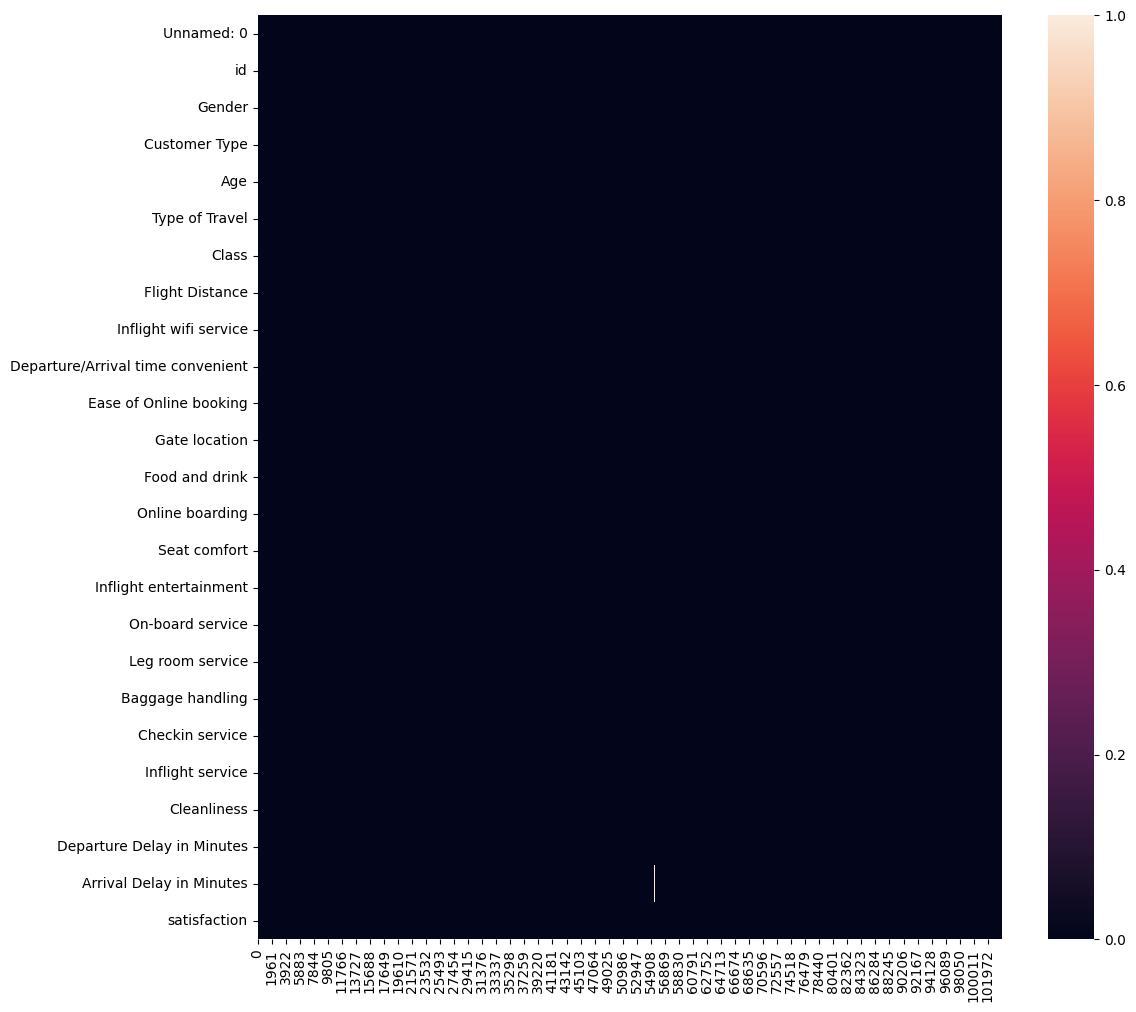

In [6]:
plt.figure(figsize=(12, 12))
data.isnull().transpose().pipe(lambda df: sb.heatmap(data = df))
plt.show()

### Exploracion univariada de los datos

- Datos numericos: Histogramas de frecuencias
  - Variables de comportamiento unico: FDP uniforme -> ignorar
  - Sesgos no naturales de la variable

- Datos categoricos: Graficos de torta.
  - Buscamos desbalances, si una categoria tiene el **80%** o mas de la proporcion de la variable hablamos de **desbalance** -> ignorar

#### Histogramas de frecuencia (variables cuantitativas)

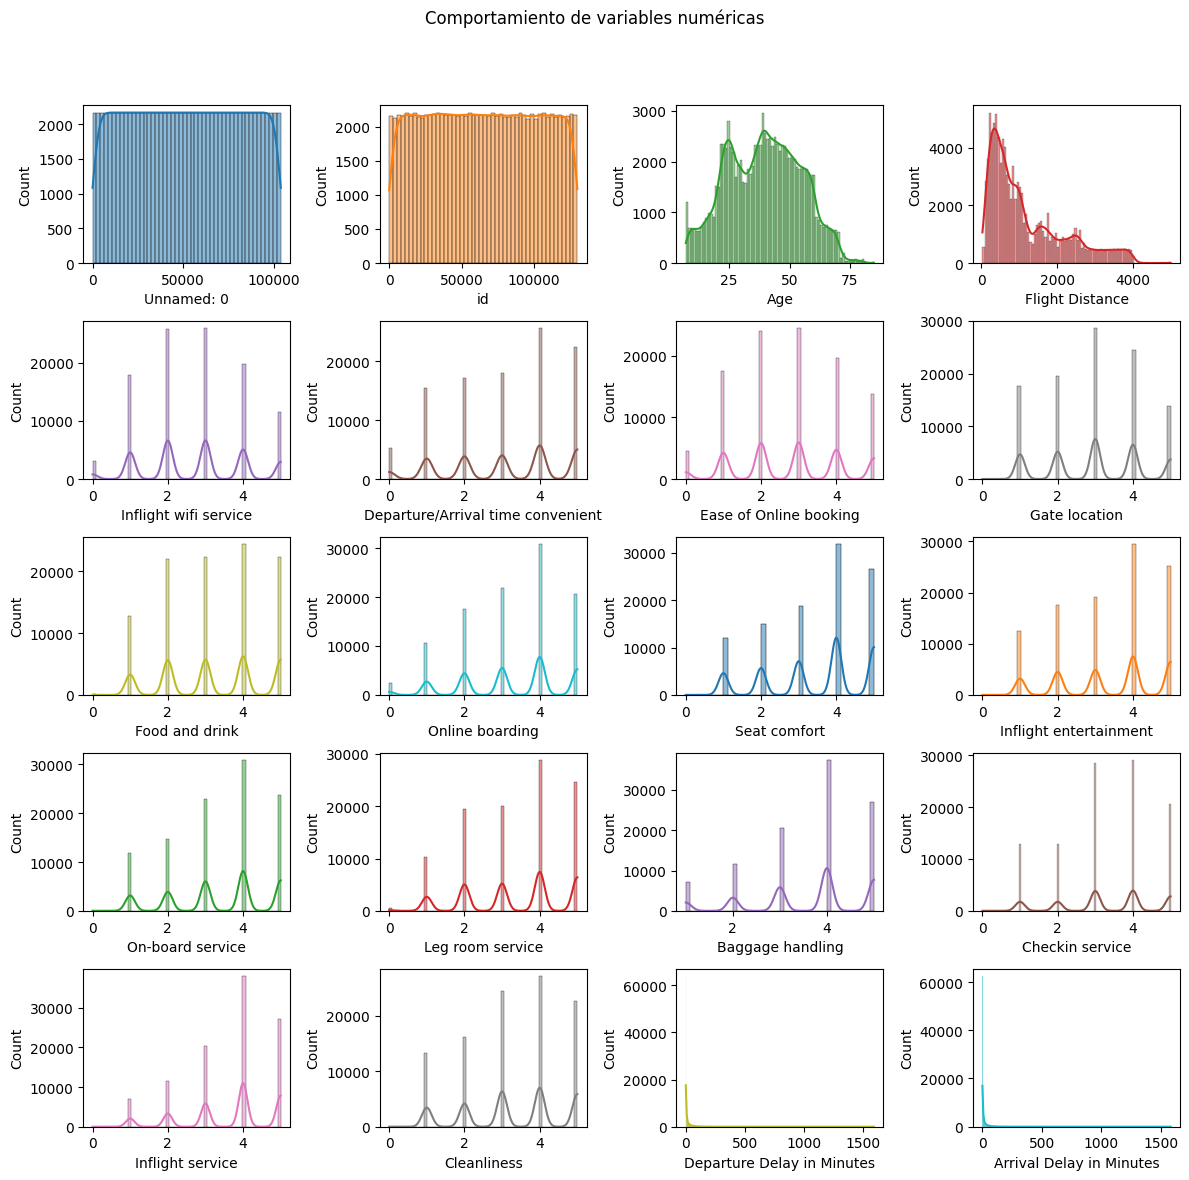

In [7]:
fig, ax = plt.subplots(5, 4, figsize=(12, 12))
ax = ax.flat

num_col = data.select_dtypes(include= ['int64', 'float64']).columns

for i, col in enumerate(num_col):
  sb.histplot(data = data, x = col, kde = True, color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'], ax = ax[i])

fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Comportamiento de variables numéricas')
plt.show()

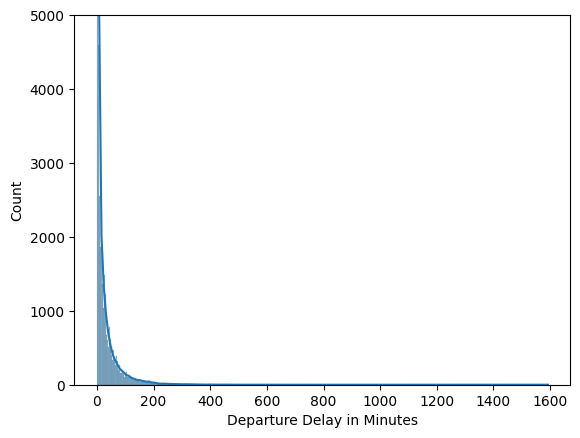

In [8]:
sb.histplot(data = data, x = data['Departure Delay in Minutes'], kde=True)
plt.ylim(0, 5000)
plt.show()

#### Graficos de torta (variables cualitativas)

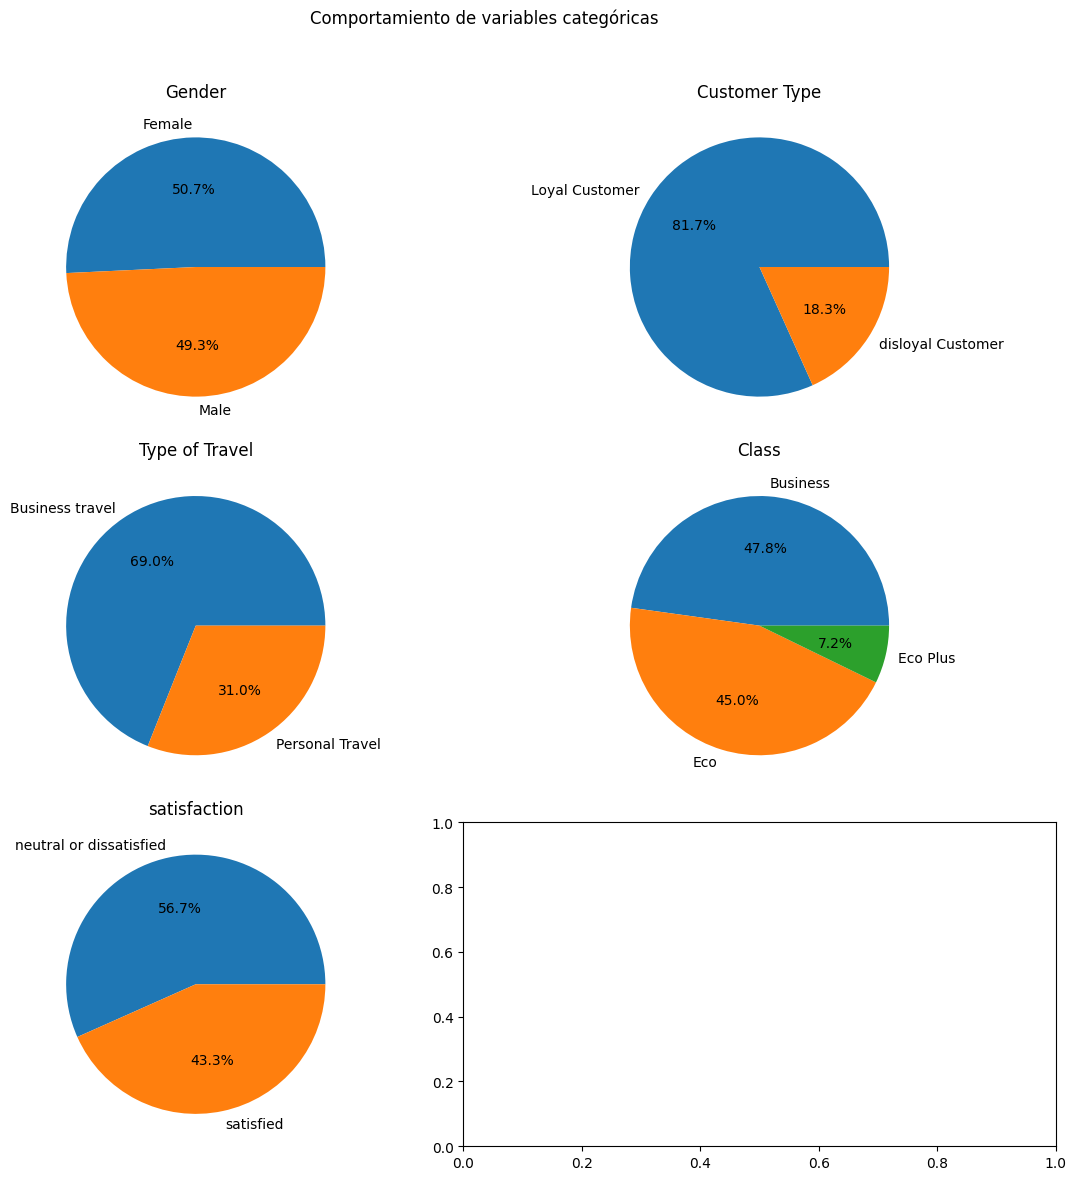

In [9]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
ax = ax.flat

cat_col = data.select_dtypes(include= ['object']).columns

for i, col in enumerate(cat_col):
  ax[i].pie(x = data[col].value_counts(), labels = data[col].value_counts().index, autopct='%0.1f%%')
  ax[i].set_title(col)

fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Comportamiento de variables categóricas')
plt.show()

#### Factor de correlacion

Si el comportamiento de una variable depende linealmende de la otra variable (ρ)

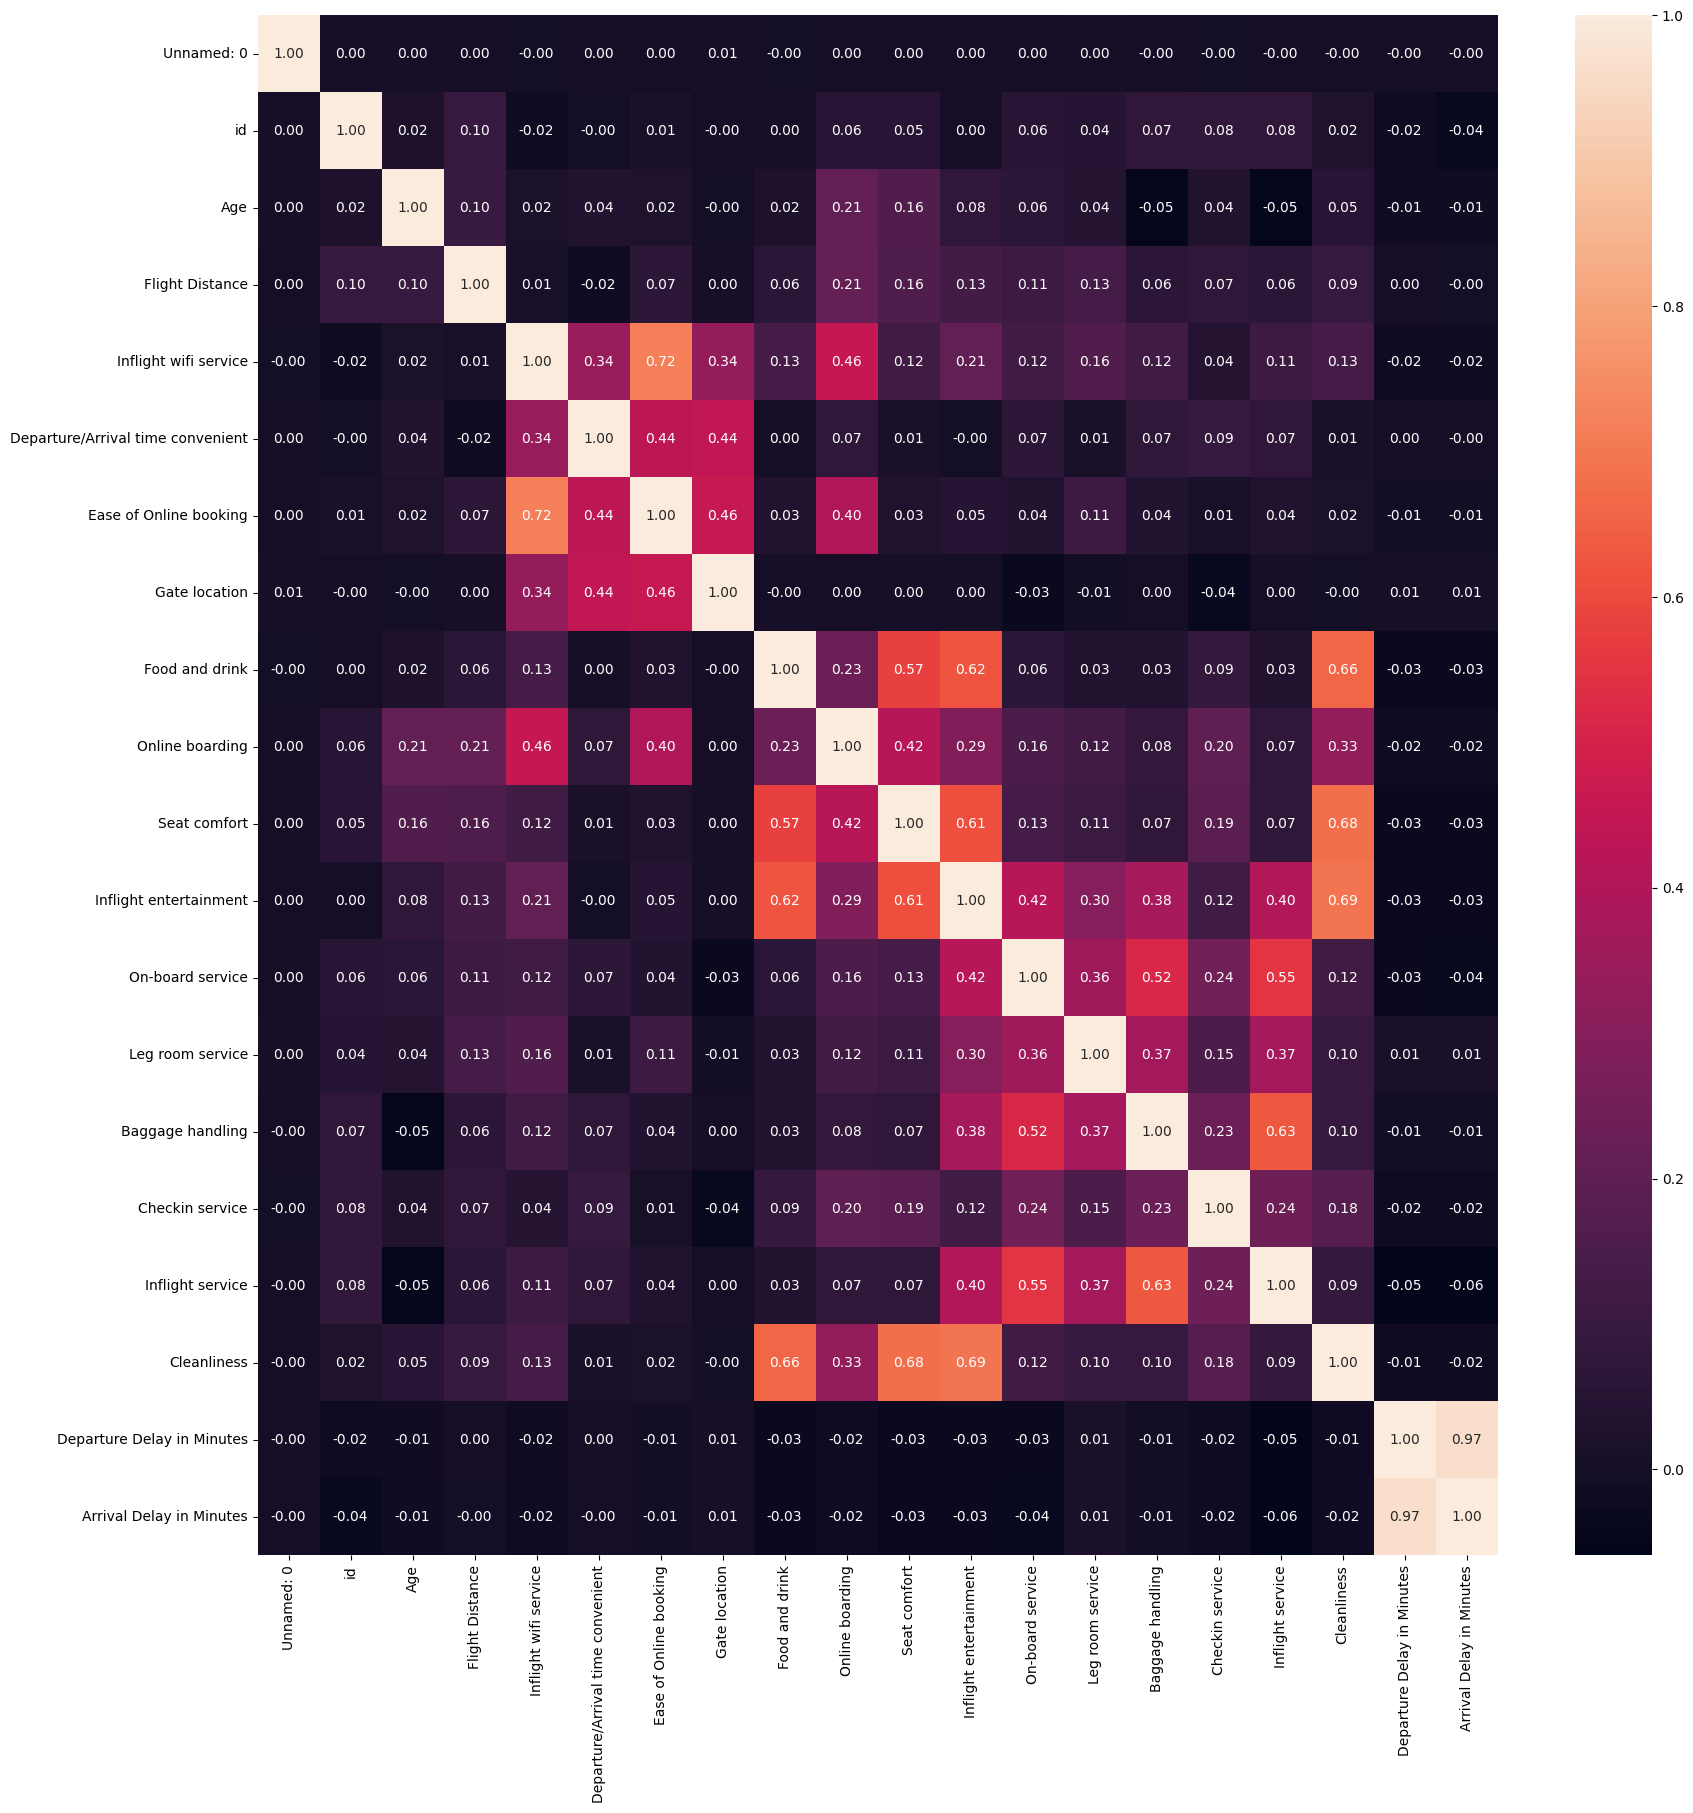

In [10]:
plt.figure(figsize=(20, 20))
sb.heatmap(data.corr(numeric_only = True), annot=True, fmt='.2f')
plt.show()

### Preparacion de los datos

- Activar las decisiones de ignorar variables
- Transformacion de variables para que sean *entendibles* para el modelo

#### Variables a eliminar
- Unnamed -> no aporta informacion al modelo

#### Variables a ignorar
- id -> no aporta informacion al modelo
- custommer type -> desbalance
- Arrival Delay in Minutes -> Tiene menor nivel de multicolinealidad con respecto a *Departure Delay in Minutes*

In [11]:
data_mod = data.drop(['Unnamed: 0', 'id', 'Customer Type', 'Arrival Delay in Minutes'], axis=1)
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103904 non-null  object
 1   Age                                103904 non-null  int64 
 2   Type of Travel                     103904 non-null  object
 3   Class                              103904 non-null  object
 4   Flight Distance                    103904 non-null  int64 
 5   Inflight wifi service              103904 non-null  int64 
 6   Departure/Arrival time convenient  103904 non-null  int64 
 7   Ease of Online booking             103904 non-null  int64 
 8   Gate location                      103904 non-null  int64 
 9   Food and drink                     103904 non-null  int64 
 10  Online boarding                    103904 non-null  int64 
 11  Seat comfort                       103904 non-null  

### Pipeline

Identificar columnas segun su tipo

In [12]:
num_col = data_mod.select_dtypes(include= ['int64', 'float64']).columns.tolist()
cat_col = data_mod.select_dtypes(include= ['object']).columns.tolist()

Definir el tipo de transformacion por tipo de datos

In [13]:
num_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])
cat_transformer = Pipeline(steps = [('encoder', OneHotEncoder())])

Diseño del transformador de columnas

In [14]:
preprocessor = ColumnTransformer(
  transformers = [
    ('num', num_transformer, num_col),
    ('cat', cat_transformer, cat_col)
  ],
  remainder = 'passthrough'
)

preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,feature_range,"(0, ...)"
,copy,True
,clip,False


Preparar la data

In [15]:
data_pre = preprocessor.fit_transform(data_mod)
data_pre

array([[0.07692308, 0.08663166, 0.6       , ..., 1.        , 1.        ,
        0.        ],
       [0.23076923, 0.04119548, 0.6       , ..., 0.        , 1.        ,
        0.        ],
       [0.24358974, 0.2243538 , 0.4       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.29487179, 0.39660743, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.19230769, 0.19567851, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.25641026, 0.34168013, 0.2       , ..., 0.        , 1.        ,
        0.        ]], shape=(103904, 26))

Data procesada

In [16]:
cod_cat = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_col)
labels = np.concatenate((num_col, cod_cat))

data_pro = pd.DataFrame(data = data_pre, columns = labels)
data_pro.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Departure Delay in Minutes,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,0.076923,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,...,0.015704,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.230769,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,...,0.000628,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.243590,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,...,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.230769,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,...,0.006910,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.692308,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,...,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


### Construcción del modelo

Usar muestra por la cantidad de datos

In [ ]:
data_pro_sample = data_pro.sample(3000)

#### Obtención valor de K

##### K_Means

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

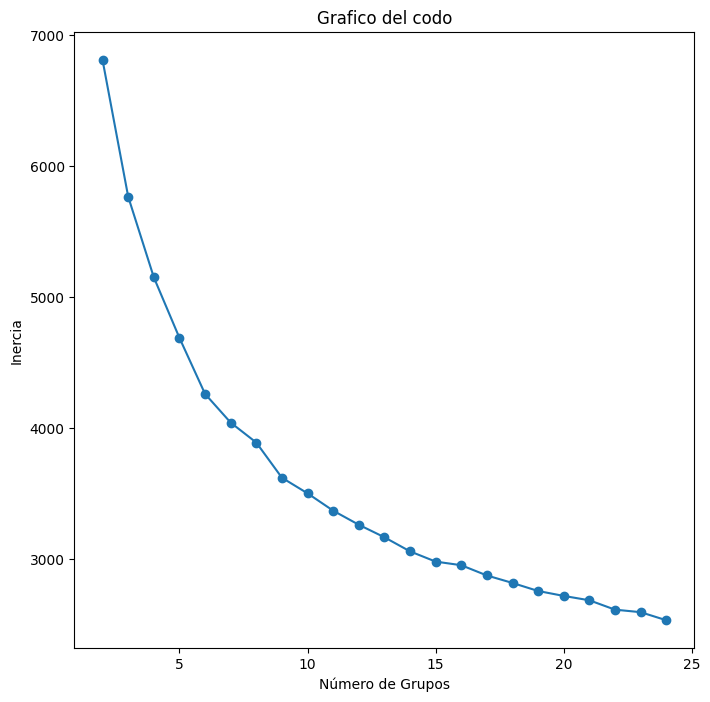

In [19]:
# Buscar el valor de K
rango_k = range(2, 25)
inercia = []

for n_clusters in rango_k:
  kmeans_model = KMeans(n_clusters = n_clusters, n_init = 20, random_state = 123)
  kmeans_model.fit(data_pro_sample)
  # kmeans_model.fit(data_pro)
  inercia.append(kmeans_model.inertia_)

plt.figure(figsize=(8, 8))
plt.plot(rango_k, inercia, marker='o')
plt.title('Grafico del codo')
plt.xlabel('Número de Grupos')
plt.ylabel('Inercia')
plt.show()

Indice de Silhouette

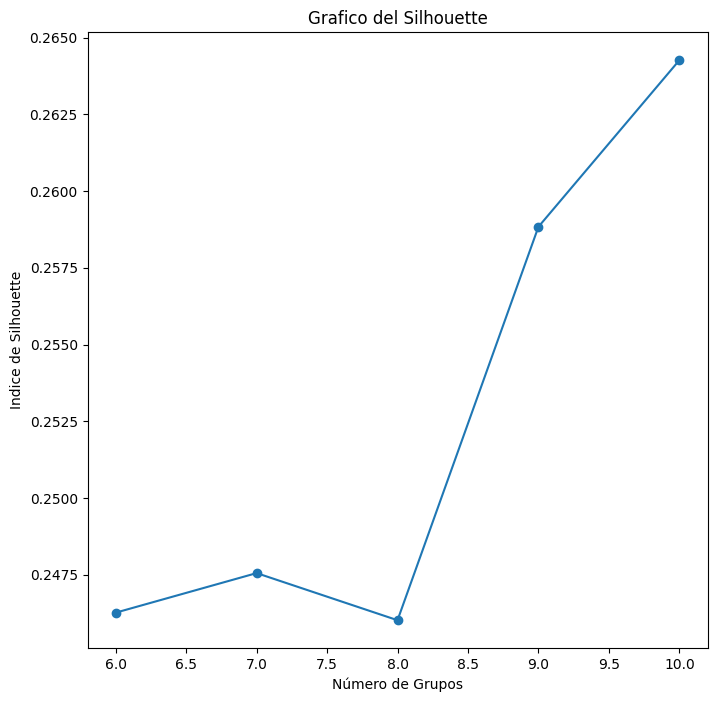

In [20]:
range_k = range(6, 11)
sil_score = []

for n_clusters in range_k:
  kmeans_model = KMeans(n_clusters = n_clusters, n_init = 20, random_state = 123)
  kmeans_model.fit(data_pro_sample)
  cluster_label = kmeans_model.fit_predict(data_pro_sample)
  sil_avg = silhouette_score(data_pro_sample, cluster_label)
  # kmeans_model.fit(data_pro)
  # cluster_label = kmeans_model.fit_predict(data_pro)
  # sil_avg = silhouette_score(data_pro, cluster_label)
  sil_score.append(sil_avg)

plt.figure(figsize=(8, 8))
plt.plot(range_k, sil_score, marker='o')
plt.title('Grafico del Silhouette')
plt.xlabel('Número de Grupos')
plt.ylabel('Indice de Silhouette')
plt.show()

In [21]:
# TODO: No esta dando resultaod q deberia
kmeans_model_final = KMeans(n_clusters = 10, n_init = 20, random_state = 123)
kmeans_model_final.fit(data_pro_sample)
# kmeans_model_final.fit(data_pro)

,n_clusters,10
,init,'k-means++'
,n_init,20
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,123
,copy_x,True
,algorithm,'lloyd'


##### Aglomerativo

In [22]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [23]:
#Función para dibujar el dendrograma
def dibujarDendrograma(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
 
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
 
    # Plot
    dendrogram(linkage_matrix, **kwargs)

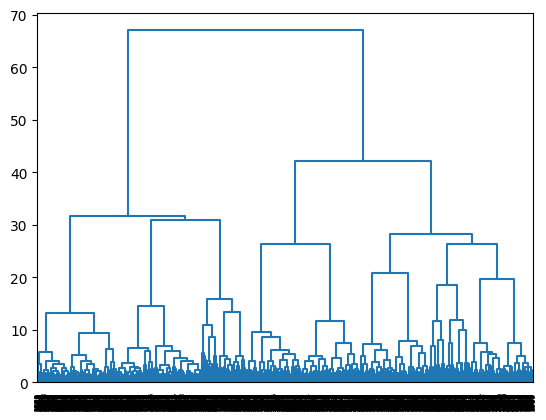

In [24]:
# Varianza
h_clust_ward = AgglomerativeClustering(n_clusters=None, metric='euclidean', linkage='ward', distance_threshold=0)
h_clust_ward.fit(data_pro_sample)
# h_clust_ward.fit(data_pro)

dibujarDendrograma(h_clust_ward, color_threshold=0)

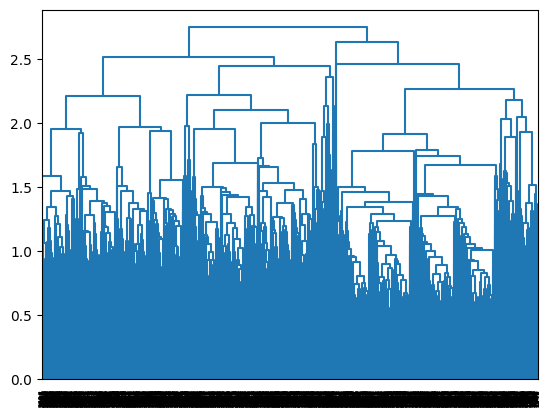

In [25]:
# Promedio
h_clust_mean = AgglomerativeClustering(n_clusters=None, metric='euclidean', linkage='average', distance_threshold=0)
h_clust_mean.fit(data_pro_sample)
# h_clust_mean.fit(data_pro)

dibujarDendrograma(h_clust_mean, color_threshold=0)

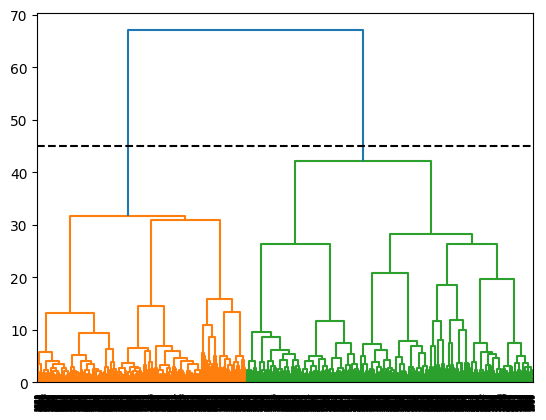

In [26]:
dendrogram_prum = 45
dibujarDendrograma(h_clust_ward, color_threshold=dendrogram_prum)
plt.axhline(y=dendrogram_prum, c='black', linestyle='--')
plt.show()

In [27]:
h_clust_final = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
h_clust_final.fit(data_pro_sample)
# h_clust_final.fit(data_pro)

,n_clusters,2
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


##### DBScan

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from itertools import product

Interesa el punto de la asintotica mayor

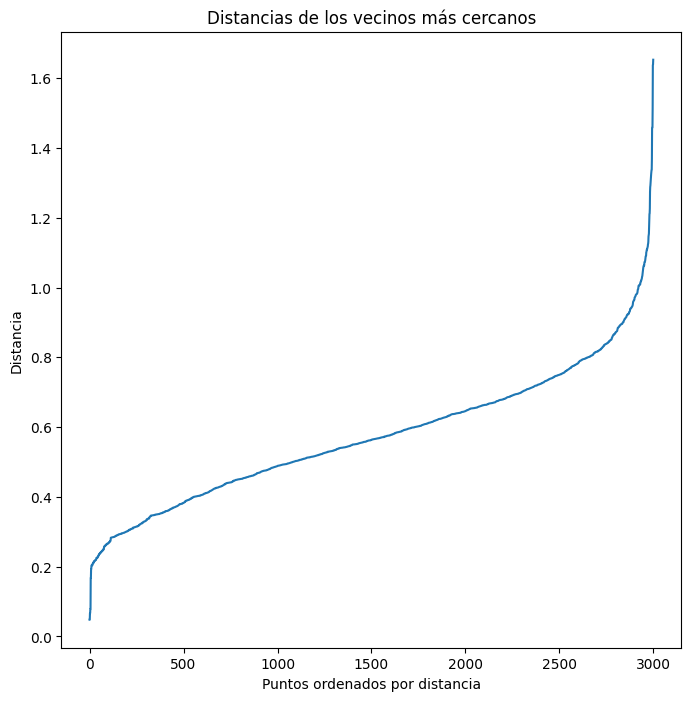

In [ ]:
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(data_pro_sample)
# neighbors_fit = neighbors.fit(data_pro)

distances, indices = neighbors_fit.kneighbors(data_pro_sample)
# distances, indices = neighbors_fit.kneighbors(data_pro)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(8, 8))
plt.plot(distances)
plt.title('Distancias de los vecinos más cercanos')
plt.xlabel('Puntos ordenados por distancia')
plt.ylabel('Distancia')
plt.show()

Se busca el mayor epsilon, en caso de haber varios, escoger menor epsilon y menor minimas muestras (en este caso por temas computacionales)

In [35]:
eps_values = np.arange(1.0, 1.6, 0.1)
min_samples = np.arange(2, 10)

dbscan_params = list(product(eps_values, min_samples))
sil_score = []

for p in dbscan_params:
  x_pred = DBSCAN(eps = p[0], min_samples=p[1]).fit_predict(data_pro_sample)
  # x_pred = DBSCAN(eps = p[0], min_samples=p[1]).fit_predict(data_pro)

  sil_score.append(silhouette_score(data_pro_sample, x_pred))
  # sil_score.append(silhouette_score(data_pro, x_pred))

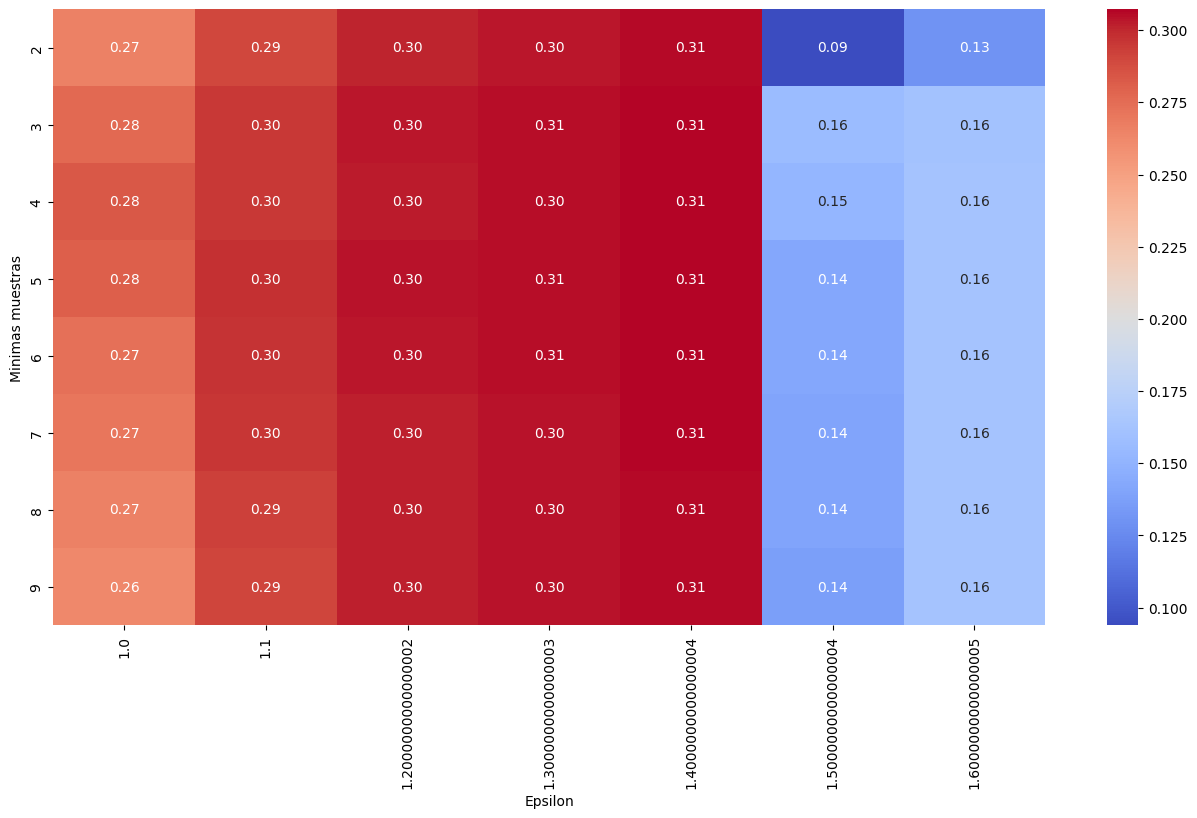

In [37]:
df_params_adj = pd.DataFrame.from_records(dbscan_params, columns=['Epsilon', 'Minimas muestras'])
df_params_adj['Score'] = sil_score

pivot_data = pd.pivot_table(df_params_adj, values = 'Score', index = 'Minimas muestras', columns = 'Epsilon')
plt.figure(figsize=(16, 8))

sb.heatmap(data=pivot_data, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

epsilon = 1.3 ; minimas_muestras = 3

In [39]:
db_final = DBSCAN(eps = 1.3, min_samples=3).fit(data_pro_sample)
db_final

,eps,1.3
,min_samples,3
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


##### GMM

In [40]:
from sklearn.mixture import GaussianMixture

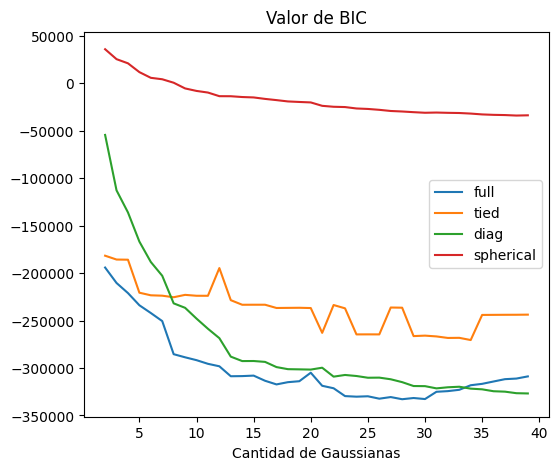

In [41]:
fig, ax = plt.subplots(figsize=(6, 5))
n_gauss = range(2, 40)
var_types = ['full', 'tied', 'diag', 'spherical']

for covariance_type in var_types:
  value_bic = []

  for i in n_gauss:
    model = GaussianMixture(n_components=i, covariance_type=covariance_type, random_state=123)
    modelo = model.fit(data_pro_sample)
    # modelo = model.fit(data_pro)

    value_bic.append(modelo.bic(data_pro_sample))
    # value_bic.append(modelo.bic(data_pro))

  ax.plot(n_gauss, value_bic, label=covariance_type)

ax.set_title('Valor de BIC')
ax.set_xlabel('Cantidad de Gaussianas')
ax.legend()
plt.show()

Seleccionar el valor minimo entre todo. El punto mas bajo entre todo, en este caso en full, con 30

In [42]:
gmm_final = GaussianMixture(n_components=30, covariance_type='full', random_state=123)
gmm_final.fit(data_pro_sample)

,n_components,30
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,123


#### Evaluacion del modelo

In [43]:
labels_kmeans = kmeans_model_final.predict(data_pro_sample)
# labels_kmeans = kmeans_model_final.predict(data_pro)

labels_h_clust = h_clust_final.fit_predict(data_pro_sample)
# labels_h_clust = h_clust_final.fit_predict(data_pro)

labels_dbscan = db_final.fit_predict(data_pro_sample)
# labels_dbscan = db_final.fit_predict(data_pro)

labels_gmm = gmm_final.predict(data_pro_sample)
# labels_gmm = gmm_final.predict(data_pro)

In [44]:
sil_kmeans = silhouette_score(data_pro_sample, labels_kmeans)
# sil_kmeans = silhouette_score(data_pro, labels_kmeans)

sil_h_clust = silhouette_score(data_pro_sample, labels_h_clust)
# sil_h_clust = silhouette_score(data_pro, labels_h_clust)

sil_dbscan = silhouette_score(data_pro_sample, labels_dbscan)
# sil_dbscan = silhouette_score(data_pro, labels_dbscan)

sil_gmm = silhouette_score(data_pro_sample, labels_gmm)
# sil_gmm = silhouette_score(data_pro, labels_gmm)

print(f'El indice de Silhouette para KMeans es: {sil_kmeans:.2f}')
print(f'El indice de Silhouette para HClust es: {sil_h_clust:.2f}')
print(f'El indice de Silhouette para DBSCAN es: {sil_dbscan:.2f}')
print(f'El indice de Silhouette para GMM es: {sil_gmm:.2f}')

El indice de Silhouette para KMeans es: 0.26
El indice de Silhouette para HClust es: 0.23
El indice de Silhouette para DBSCAN es: 0.31
El indice de Silhouette para GMM es: 0.07


**Nota:** Se selecciona el mayor indice de Silhouette

En este caso es el DBScan, se debe de hacer validacion de cuantos grupos y puntos de ruido tiene.

In [45]:
np.unique(labels_dbscan)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22])

In [46]:
data_pro_sample['DBSCAN'] = labels_dbscan
data_pro_sample

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied,DBSCAN
14971,0.333333,0.054523,0.6,0.4,1.0,0.4,0.6,0.6,0.6,0.6,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
22901,0.333333,0.064822,0.2,0.8,0.2,1.0,0.2,0.2,0.2,0.2,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
36561,0.115385,0.772617,0.6,1.0,1.0,1.0,0.4,0.4,0.6,0.4,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
8606,0.679487,0.597738,0.2,0.2,0.2,0.2,1.0,1.0,1.0,0.8,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2
80757,0.897436,0.019790,0.2,0.0,0.2,1.0,0.2,0.2,0.2,0.2,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10184,0.230769,0.189015,0.2,0.4,0.2,0.6,0.4,0.2,0.4,0.4,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,7
38963,0.320513,0.572496,0.8,0.8,0.8,0.8,0.8,0.8,1.0,0.8,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5
67530,0.794872,0.076131,0.6,0.8,0.8,0.8,0.6,0.8,0.6,0.6,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,6
45705,0.384615,0.054927,0.6,0.8,0.6,0.8,0.6,0.8,0.8,0.4,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,15


In [47]:
data_pro_sample.DBSCAN.value_counts()

DBSCAN
 2     512
 5     479
 1     347
 4     335
 10    215
 6     205
 0     188
 3     186
 12    101
 9      77
 11     50
 7      46
 17     32
 8      30
 14     30
 21     28
 15     26
 18     25
 16     23
-1      23
 20     20
 19     10
 22      7
 13      5
Name: count, dtype: int64

El -1 indica que hay 23 individuos que no se sabe que son, por lo tanto, DBSCAN dice que son 23 grupos y 23 inidividuos como ruido.